# Hands-on: Deciphering Inka Khipu Signs


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_proportion_confint_digits(actual_first_digit_frequencies, 
                                         actual_first_digit_counts, 
                                         expected_first_digit_frequencies,
                                         label_actual,
                                         label_expected,
                                         title
                                        ):
    # Import function-specific package:
    from statsmodels.stats.proportion import multinomial_proportions_confint
    
    # Plot 95% CIs as lines with caps on the top and bottom for easier interpretation
    plt.figure(figsize=(9,5))

    (_, caps, _) = plt.errorbar(x=np.arange(1, 10, 1), 
                     y=actual_first_digit_frequencies, 
                     yerr=[(top-bot)/2 for top,bot in multinomial_proportions_confint(actual_first_digit_counts)],
                     capsize=5, fmt='none', label=label_actual+' 95% CI')

    for cap in caps:
        cap.set_markeredgewidth(1)

    # Plot expected values as scatter plot points, in order to visualize where CIs include expected values
    plt.scatter(np.arange(1,10,1), expected_first_digit_frequencies, label=label_expected, color='red')
    
    # Format 
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.xlabel('First Digits')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend();
    
    return

expected_frequencies = pd.Series([.301, .176, .125, .097, .079, .067, .058, .051, .046], 
                                 index = [1, 2, 3, 4, 5, 6, 7, 8, 9]
                                )

In [4]:
population_df = pd.read_csv('Population_by_County_2010_Census.csv')
population_df.head()

,GEO.id,GEO.id2,Geography,Population
0,0500000US01001,1001,"Autauga County, Alabama",54571
1,0500000US01003,1003,"Baldwin County, Alabama",182265
2,0500000US01005,1005,"Barbour County, Alabama",27457
3,0500000US01007,1007,"Bibb County, Alabama",22915
4,0500000US01009,1009,"Blount County, Alabama",57322


In [6]:
population_size = population_df['Population']
population_size

0        54571
1       182265
2        27457
3        22915
4        57322
         ...  
3137     43806
3138     21294
3139     21118
3140      8533
3141      7208
Name: Population, Length: 3142, dtype: int64

In [7]:
def first_digit(number):
    return int(str(number)[0])

In [9]:
first_digits_population_size = population_size.apply(first_digit)
first_digits_population_size

0       5
1       1
2       2
3       2
4       5
       ..
3137    4
3138    2
3139    2
3140    8
3141    7
Name: Population, Length: 3142, dtype: int64

Need to calculate how many times digit occurs in the series we have here, as a whole
Take count of each one of these values, which we can do in pandas, and then divide that by the number of entries
that we have (finding the ratio).

In [21]:
first_digit_frequencies = first_digits_population_size.value_counts()/len(first_digits_population_size)
first_digit_frequencies.sort_index(inplace=True)
first_digit_frequencies

1    0.303310
2    0.189052
3    0.119032
4    0.098027
5    0.067791
6    0.066836
7    0.057925
8    0.048377
9    0.049650
Name: Population, dtype: float64

*does obey the downward slope we would expect*

Text(0, 0.5, 'Frequency')

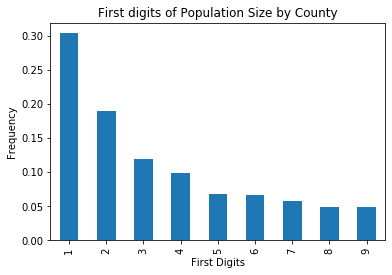

In [22]:
first_digit_frequencies.plot(kind='bar', title='First digits of Population Size by County')
plt.xlabel('First Digits')
plt.ylabel('Frequency')

In [23]:
freqs = pd.DataFrame([first_digit_frequencies, expected_frequencies])  #expected frequencies by benford's law
#above
freqs

,1,2,3,4,5,6,7,8,9
Population,0.30331,0.189052,0.119032,0.098027,0.067791,0.066836,0.057925,0.048377,0.04965
Unnamed 0,0.30100,0.176000,0.125000,0.097000,0.079000,0.067000,0.058000,0.051000,0.04600


*we don't want it like this, so just transpose the dataframe*

In [30]:
freqs = pd.DataFrame([first_digit_frequencies, expected_frequencies]).T
freqs.columns = ['Actual', 'Expected']
freqs

,Actual,Expected
1,0.303310,0.301
2,0.189052,0.176
3,0.119032,0.125
4,0.098027,0.097
5,0.067791,0.079
6,0.066836,0.067
7,0.057925,0.058
8,0.048377,0.051
9,0.049650,0.046


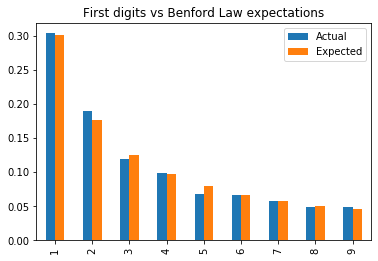

In [25]:
freqs.plot(kind='bar', title='First digits vs Benford Law expectations')

In [33]:
from scipy.stats import chisquare

actual_counts = first_digits_population_size.value_counts()
expected_counts = expected_frequencies*len(first_digits_population_size)
chisquare(actual_counts, f_exp=expected_counts)

Power_divergenceResult(statistic=9.522569120793193, pvalue=0.3001453330051994)

This kind of a general output/test makes it hard to test where there might be statistical differences between these in much detail (were there more fives than expected, for example)?

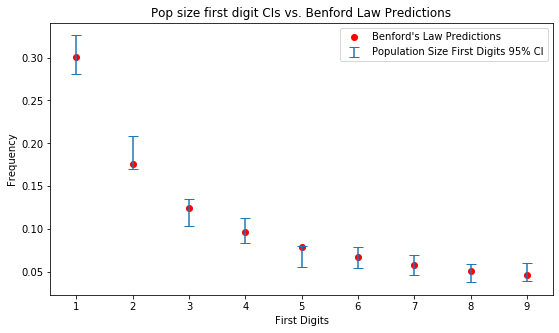

In [35]:
plot_multi_proportion_confint_digits(actual_first_digit_frequencies = first_digit_frequencies,
                                    actual_first_digit_counts = actual_counts,
                                    expected_first_digit_frequencies = expected_frequencies,
                                    label_actual = 'Population Size First Digits', 
                                    label_expected = "Benford's Law Predictions",
                                    title = 'Pop size first digit CIs vs. Benford Law Predictions')

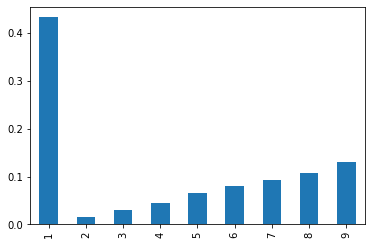

In [64]:
np.random.seed(0)

uniform_sum = np.random.randint(1,9,10000) + np.random.randint(1,9, 10000)

first_digit_uniform = pd.Series(uniform_sum).apply(first_digit)
first_digit_uniform

uniform_first_digit_frequencies = first_digit_uniform.value_counts()/len(first_digit_uniform)
uniform_first_digit_frequencies.sort_index(inplace=True)
uniform_first_digit_frequencies.plot(kind='bar')

#something clearly went wrong here lmao

In [47]:
khipu_cords = pd.read_pickle('khipu_cords.pkl')
khipu_cords.tail()

,Unnamed: 0,Khipu,Cord,Fiber,Value,Colors,Spin_Ply,Attachment,Termin,Length,Anomalous
56822,3146,UR294,1,CN,100,LB,Z,V,K,34.5,False
56823,3147,UR294,2,CN,22,MB,Z,V,B,22.5,False
56824,3148,UR294,3,CN,65,NB,Z,V,K,17.5,False
56825,3149,UR294,4,CN,52,W,Z,V,K,23.0,False
56826,3150,UR294,5,CN,0,MB\t (0-23) \r\nMB:W:BG\t (23-27) \r\nMB\t (27...,Z,V,K,40.5,False


In [55]:
#khipu_cords[khipu_cords['Anomalous'] != False] ['Value'].apply(first_digit)
first_digit_anomalous = khipu_cords[khipu_cords['Anomalous'] != False] ['Value'].apply(first_digit)
first_digit_normal = khipu_cords[khipu_cords['Anomalous'] == False] ['Value'].apply(first_digit)

first_digit_anomalous = first_digit_anomalous[first_digit_anomalous != 0]
first_digit_normal = first_digit_normal[first_digit_normal != 0]

In [60]:
anomalous_first_digit_frequencies = first_digit_anomalous.value_counts()/len(first_digit_anomalous)
anomalous_first_digit_frequencies.sort_index(inplace=True)
normal_first_digit_frequencies = first_digit_normal.value_counts()/len(first_digit_normal)
normal_first_digit_frequencies.sort_index(inplace=True)

In [61]:
freqs_cord_values = pd.DataFrame([anomalous_first_digit_frequencies,
                                 normal_first_digit_frequencies,
                                 expected_frequencies,
                                 uniform_first_digit_frequencies]).T
freqs_cord_values.columns = ['Anomalous', 'Normal', 'Expected (Benford)', 'Expected ((Uniform Sum))']
freqs_cord_values

,Anomalous,Normal,Expected (Benford),Expected ((Uniform Sum))
1,0.329212,0.377575,0.301,NaN
2,0.189332,0.198318,0.176,1.0
3,0.113387,0.120762,0.125,NaN
4,0.085129,0.095302,0.097,NaN
5,0.060756,0.069059,0.079,NaN
6,0.058637,0.051228,0.067,NaN
7,0.053338,0.035941,0.058,NaN
8,0.056164,0.030966,0.051,NaN
9,0.054045,0.020849,0.046,NaN


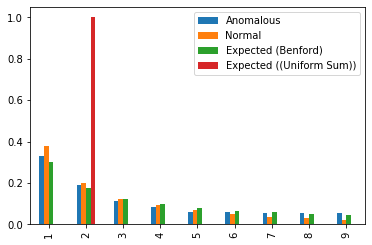

In [63]:
freqs_cord_values.plot(kind='bar') #figure out how to make it larger

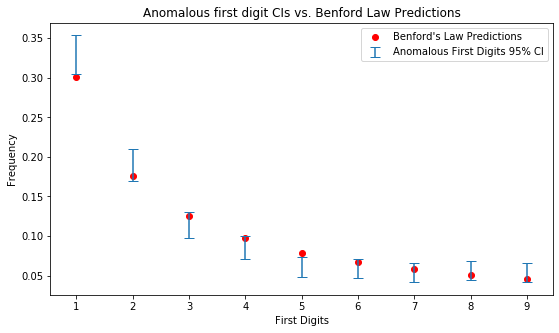

In [65]:
#confidence intervals anomalous and normal

plot_multi_proportion_confint_digits(actual_first_digit_frequencies = anomalous_first_digit_frequencies,
                                    actual_first_digit_counts = first_digit_anomalous.value_counts(),
                                    expected_first_digit_frequencies = expected_frequencies,
                                    label_actual = 'Anomalous First Digits', 
                                    label_expected = "Benford's Law Predictions",
                                    title = 'Anomalous first digit CIs vs. Benford Law Predictions')

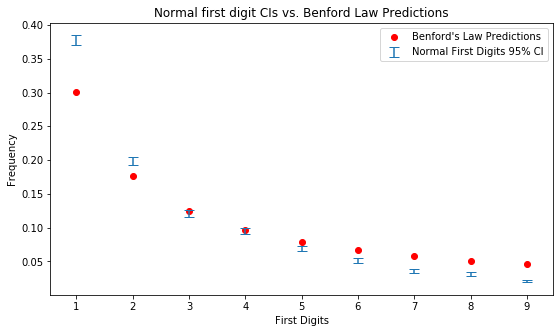

In [66]:
plot_multi_proportion_confint_digits(actual_first_digit_frequencies = normal_first_digit_frequencies,
                                    actual_first_digit_counts = first_digit_normal.value_counts(),
                                    expected_first_digit_frequencies = expected_frequencies,
                                    label_actual = 'Normal First Digits', 
                                    label_expected = "Benford's Law Predictions",
                                    title = 'Normal first digit CIs vs. Benford Law Predictions')